In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# CREATING PATH
path = r"/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/Cleaned_flavors_of_cacao.csv"
# IMPORTING DATA
df=pd.read_csv(path)

In [3]:
df.head

<bound method NDFrame.head of      Company  (Maker-if known)             BarName   REF  ReviewDate  \
0                     A. Morin         Agua Grande  1876  2016-01-01   
1                     A. Morin               Kpime  1676  2015-01-01   
2                     A. Morin              Atsane  1676  2015-01-01   
3                     A. Morin               Akata  1680  2015-01-01   
4                     A. Morin              Quilla  1704  2015-01-01   
...                        ...                 ...   ...         ...   
1790                    Zotter                Peru   647  2011-01-01   
1791                    Zotter               Congo   749  2011-01-01   
1792                    Zotter        Kerala State   749  2011-01-01   
1793                    Zotter        Kerala State   781  2011-01-01   
1794                    Zotter  Brazil, Mitzi Blue   486  2010-01-01   

      CocoaPercent Location  Rating   BeanType BroadOrigin  Decade  
0             0.63   France    3.75 

In [4]:
# Drop columns not used in EDA
for col in ['REF', 'BarName']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [5]:
# Confirm final shape and columns
df.shape, df.columns.tolist()

((1795, 8),
 ['Company\xa0 (Maker-if known)',
  'ReviewDate',
  'CocoaPercent',
  'Location',
  'Rating',
  'BeanType',
  'BroadOrigin',
  'Decade'])

In [6]:
# 1. Normalize all column names: replace any \xa0 with a normal space, then strip leading/trailing whitespace
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]

# 2. Now rename the cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin',
 'Decade']

In [7]:
# Encode categoricals
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now compute correlation matrix
corr = numeric_df.corr()

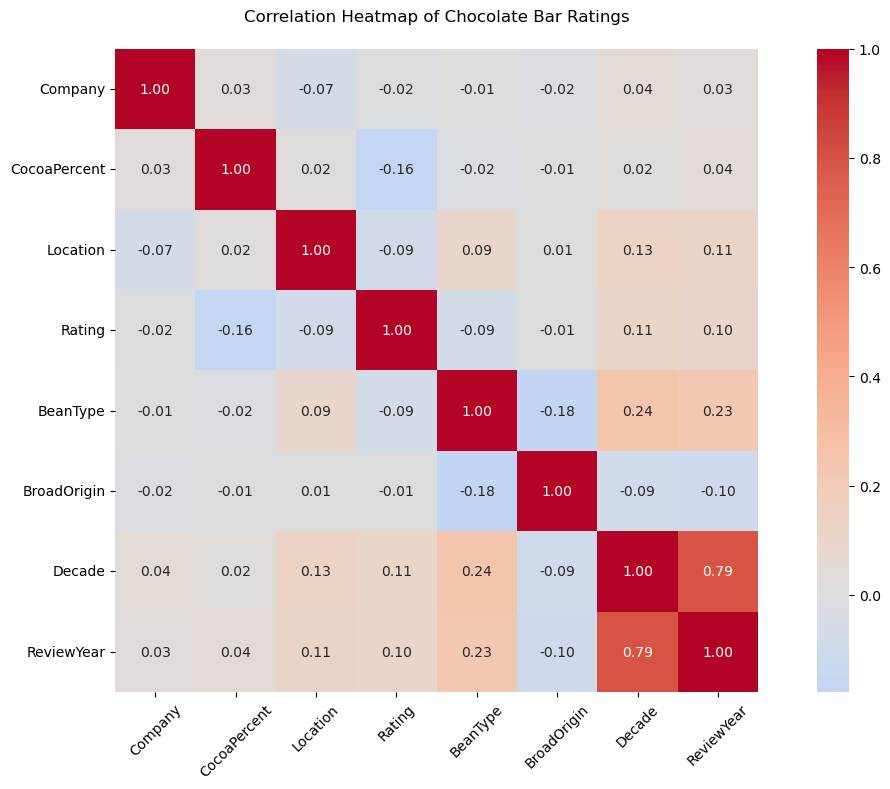

In [25]:
# 1. Make a clean copy of the dataframe
encoded = df.copy()

# 2. Handle dates properly - convert to datetime and extract year
encoded['ReviewDate'] = pd.to_datetime(encoded['ReviewDate'])
encoded['ReviewYear'] = encoded['ReviewDate'].dt.year
encoded = encoded.drop('ReviewDate', axis=1)  # Remove original date column

# 3. Encode categorical variables properly
categorical_cols = ['Company', 'Location', 'BeanType', 'BroadOrigin']
for col in categorical_cols:
    # Fill NA values first to avoid encoding issues
    encoded[col] = encoded[col].fillna('Unknown').astype('category').cat.codes

# 4. Ensure all remaining columns are numeric
numeric_cols = encoded.select_dtypes(include=['number'])

# 5. Calculate and plot correlations
plt.figure(figsize=(12, 8))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0, square=True)
plt.title('Correlation Heatmap of Chocolate Bar Ratings', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation Heatmap Interpretation 
- Slight negative correlation between 'CocoaPercent' and 'Rating'.
- Other variables show very weak correlations, indicating minimal linear dependencies.

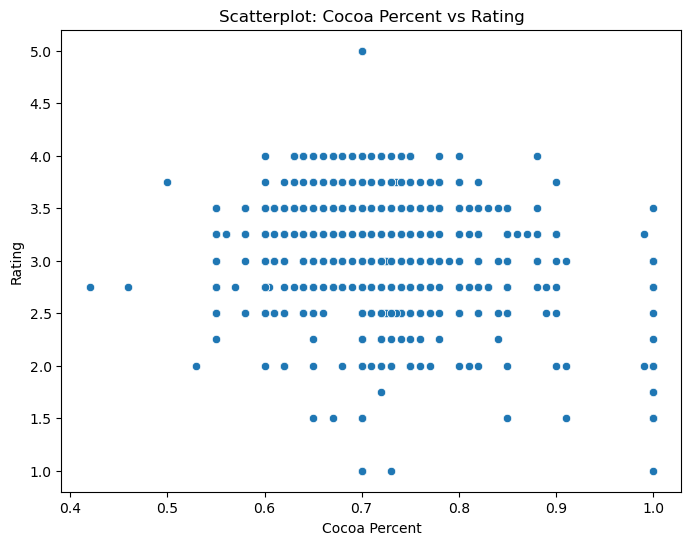

In [10]:
#  Scatterplot: CocoaPercent vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CocoaPercent', y='Rating')
plt.title('Scatterplot: Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

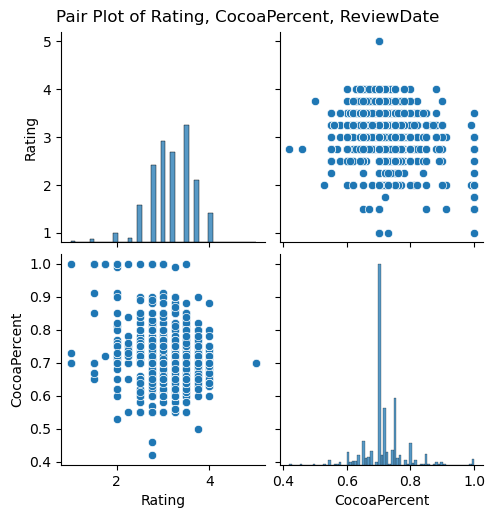

In [27]:
# Pair Plot: Rating, CocoaPercent, ReviewDate
sns.pairplot(df[['Rating', 'CocoaPercent', 'ReviewDate']])
plt.suptitle('Pair Plot of Rating, CocoaPercent, ReviewDate', y=1.02)
plt.show()

# Pair Plot Interpretation:
Reinforces negative trend between Rating and CocoaPercent.
No clear time-based trend in ReviewDate.

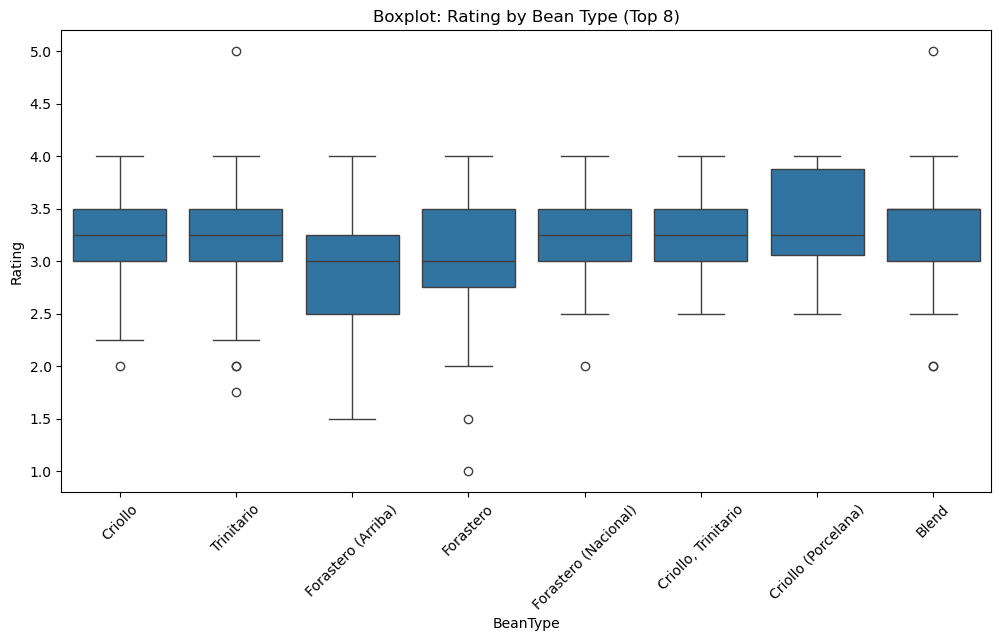

In [30]:
# Categorical Plot: Rating by BeanType (top 8)
plt.figure(figsize=(12, 6))
top_beans = df['BeanType'].value_counts().nlargest(8).index
sns.boxplot(data=df[df['BeanType'].isin(top_beans)],
            x='BeanType', y='Rating')
plt.xticks(rotation=45)
plt.title('Boxplot: Rating by Bean Type (Top 8)')
plt.show()

# Categorical Plot Interpretation:
 - Trinitario & Criollo have higher median ratings.
 - Forastero & Unknown show wider rating variability.

In [52]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Original Data/flavors_of_cacao.csv')  # Adjust filename if needed

# Show all column names exactly as they appear in your data
print("Actual columns in your dataset:")
print(df.columns.tolist())

# Show sample data to verify content
print("\nFirst 3 rows of data:")
print(df.head(3))

Actual columns in your dataset:
['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

First 3 rows of data:
  Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                   A. Morin                       Agua Grande  1876   
1                   A. Morin                             Kpime  1676   
2                   A. Morin                            Atsane  1676   

   Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0          2016            63%            France    3.75              
1          2015            70%            France    2.75              
2          2015            70%            France    3.00              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  


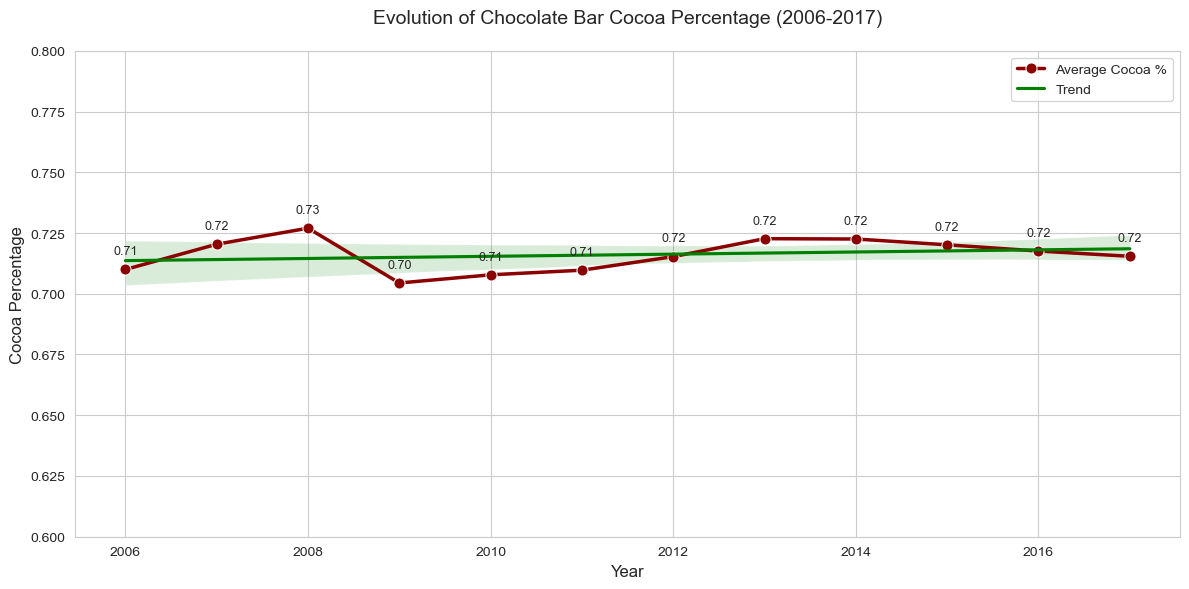


=== Statistical Summary ===
Time Period: 2006 to 2017
Correlation Coefficient: 0.232
Statistical Significance: No (p = 0.4682)
Average Annual Increase: 0.049 percentage points


In [54]:
# Load and prepare the data
df = pd.read_csv('/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Original Data/flavors_of_cacao.csv')

# Clean column names (remove \n and special spaces)
df.columns = [col.replace('\n', ' ').replace('\xa0', ' ').strip() for col in df.columns]

# Rename columns for easier handling
df = df.rename(columns={
    'Company  (Maker-if known)': 'Company',
    'Specific Bean Origin or Bar Name': 'BarName',
    'Review Date': 'ReviewDate',
    'Cocoa Percent': 'CocoaPercent',
    'Company Location': 'Location',
    'Bean Type': 'BeanType',
    'Broad Bean Origin': 'BeanOrigin'
})

# Convert data types
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'], format='%Y', errors='coerce')  # Years only
df['Year'] = df['ReviewDate'].dt.year
df['CocoaPercent'] = df['CocoaPercent'].str.rstrip('%').astype(float) / 100

# Analyze cocoa percentage trends
yearly_trend = df.groupby('Year')['CocoaPercent'].agg(['mean', 'count'])
yearly_trend = yearly_trend[yearly_trend['count'] >= 10]  # Only years with sufficient data

# Visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot mean trend
ax = sns.lineplot(
    x=yearly_trend.index,
    y='mean',
    data=yearly_trend,
    color='darkred',
    linewidth=2.5,
    marker='o',
    markersize=8,
    label='Average Cocoa %'
)

# Add regression line
sns.regplot(
    x=yearly_trend.index,
    y='mean',
    data=yearly_trend,
    scatter=False,
    color='green',
    label='Trend'
)

# Formatting
plt.title('Evolution of Chocolate Bar Cocoa Percentage (2006-2017)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cocoa Percentage', fontsize=12)
plt.ylim(0.60, 0.80)
plt.legend()
plt.tight_layout()

# Add data labels
for year, row in yearly_trend.iterrows():
    ax.text(
        year,
        row['mean'] + 0.005,
        f"{row['mean']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

# Statistical analysis
corr, p_value = pearsonr(yearly_trend.index, yearly_trend['mean'])
annual_change = yearly_trend['mean'].diff().mean() * 100

print("\n=== Statistical Summary ===")
print(f"Time Period: {yearly_trend.index.min()} to {yearly_trend.index.max()}")
print(f"Correlation Coefficient: {corr:.3f}")
print(f"Statistical Significance: {'Yes' if p_value < 0.05 else 'No'} (p = {p_value:.4f})")
print(f"Average Annual Increase: {annual_change:.3f} percentage points")